           x1        x2  y
475  0.954984  1.204260  1
485 -0.089920  1.357281  1
783  0.371233  1.455203  1
960  0.672211 -1.298736  0
968 -0.878392  0.921109  1
..        ...       ... ..
266  0.656559  1.227642  1
278  1.249678  0.387056  1
697 -1.426578 -0.165599  1
902 -2.946831 -0.814270  0
271  0.434864  1.294124  1

[800 rows x 3 columns]
[[  7.17688415]
 [192.04942638]] [[  -8.51479486]
 [-204.9068106 ]]
(2, 2)
[[ 0.89652969 -0.03984597]
 [-0.03984597  0.22047281]]
[[ 0.86762894 -0.0015044 ]
 [-0.0015044   0.11317387]]
sw_inverse:    [[0.56849388 0.07045607]
 [0.07045607 3.00591445]]
w: [[  36.8886002 ]
 [1194.32206106]]
(2, 1)
[0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0

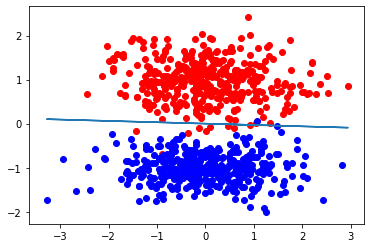

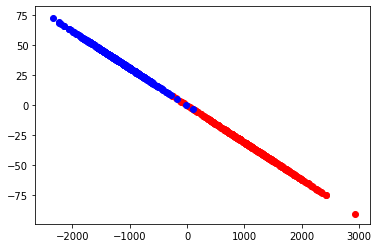

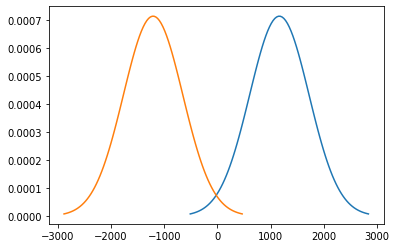

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def accuracy_score(c,t):
    return (c/t)*100
  
#Fisher's Linear Discriminant for a1_d1
df=pd.read_csv('a1_d1.csv', header=None)
df1=df.sample(frac=0.8, random_state=1011)
df2=df.drop(df1.index)
df1.columns=['x1','x2','y']
df2.columns=['x1','x2','y']
X_train=df1.drop(columns='y')
Y_train=df1['y']
X_test=df2.drop(columns='y')
Y_test=df2['y']
df2.to_numpy()
df1.to_numpy()
print(df1)
m1=[]
x1_c1=[] 
x2_c1=[]
x1_c2=[] 
x2_c2=[]
i=0
for i in range(len(df1)):
    if df1.iloc[i,2]==1:
        x1_c1.append(df1.iloc[i,0])
        x2_c1.append(df1.iloc[i,1])
        i=i+1
    elif df1.iloc[i,2]==0:
        x1_c2.append(df1.iloc[i,0])
        x2_c2.append(df1.iloc[i,1])
        i=i+1


x1_c1=np.array(x1_c1)
x2_c1=np.array(x2_c1)  
x1_c2=np.array(x1_c2)
x2_c2=np.array(x2_c2)
x_c1=(x1_c1,x2_c1)
x_c1=np.array(x_c1)
x_c2=(x1_c2,x2_c2)
x_c2=np.array(x_c2)
sum_1=(x1_c1.sum(),x2_c1.sum()) 
sum_1=np.array(sum_1)
m1=np.array(m1)
m1=(1/len(x_c1))*(sum_1)#Mean of Class c1 i.e belonging to class 1
m1=m1.reshape(-1,1)

sum_2=(x1_c2.sum(),x2_c2.sum())  #Mean of Class c2
sum_2=np.array(sum_2)
m2=(1/len(x_c2))*(sum_2)
m2=np.array(m2)
m2=m2.reshape(-1,1)
print(m1, m2)
print((((x_c1.T)[0].reshape(-1,1)-m1).dot((((x_c1.T)[0].reshape(-1,1)-m1).T))).shape)
# Now, we compute within class covariance matrix
s1=np.cov(x_c1)
s2=np.cov(x_c2)
print(s1)
print(s2)
sw=s1+s2
sw=np.array(sw)
#sw_inverse
sw_inverse= np.linalg.inv(sw)
print(f"sw_inverse:    {sw_inverse}")

#Finding the optimal direction
w=sw_inverse.dot(m1-m2)
print(f"w: {w}")
print(w.shape)




#coverted 2d to 1D points
x_c1_1d=(w.T).dot(x_c1)
x_c2_1d=(w.T).dot(x_c2)
(w1,w2)=w
m=-(w1/w2)

#converting testing data 2d to 1D
x_1d_t=(X_test).dot(w)
x_1d_t=np.array(x_1d_t)
i=0
y_pred=[]
for i in range(len(x_1d_t)):
    if (x_1d_t[i])>0:
        y_pred.append(1)
    elif x_1d_t[i]<0:
        y_pred.append(0)
    i+=1

print(y_pred)
y_pred=np.array((y_pred))
Y_test=np.array(Y_test)
i=0
sum=0
for i in range(len(y_pred)):
    if y_pred[i]==Y_test[i]:
        sum+=1
    i=i+1

print('sum:',sum)
print('accuracy_score', accuracy_score(sum,len(Y_test)))
#plotting the 2D points along with the classifier
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x1_c1,x2_c1,c='Red') #belonging to class1
ax1.scatter(x1_c2,x2_c2,c='Blue')
ax1.plot(df1.x1, m*(df1.x1) )

#plotting transformed points on the line
fig = plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(x_c1_1d, m*(x_c1_1d), c='Red')
ax2.scatter(x_c2_1d, m*(x_c2_1d), c='Blue')


#plotting the normal distribution for both the classes and finding the threshold point
mean_c1=np.mean(x_c1_1d)
var_c1=np.var(x_c1_1d)
mean_c2=np.mean(x_c2_1d)
var_c2=np.var(x_c2_1d)
sigma = np.sqrt(var_c1)
x1= np.linspace(mean_c1 - 3*sigma,mean_c1 + 3*sigma, 100)
x2 = np.linspace(mean_c2 - 3*sigma,mean_c2 + 3*sigma, 100)
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.plot(x1, norm.pdf(x1, mean_c1, sigma))
ax3.plot(x2, norm.pdf(x1, mean_c1, sigma))
x=

In [ ]:
i=0
#print(((x_c1.T)[0].reshape(-1,1)-m1).dot((((x_c1.T)[0].reshape(-1,1)-m1).T)))
#print(len(x_c1.T))
#print(((((x_c1.T)[0]).T-m1.T).dot(((((x_c1.T)[0]).T-m1.T).T))))
#for i in range(len(x_c1.T)):   
#    np.stack((s1,(((x_c1.T)[i].reshape(-1,1)-m1).dot((((x_c1.T)[i].reshape(-1,1)-m1).T)))),axis=0)
#    s2=((x_c1.T)[0].reshape(-1,1)-m1).dot((((x_c1.T)[0].reshape(-1,1)-m1).T))
#    i=i+1
#(np.transpose(np.transpose(x_c1))[0]-m1)

In [49]:
#Fisher's Linear Discriminant for a1_d2
dff=pd.read_csv('a1_d2.csv', header=None)
df1=dff.sample(frac=0.8,random_state=1011)
df2=dff.drop(df1.index)
df1.columns=['x1','x2','x3','y']
df2.columns=['x1','x2','x3','y']
x_train=df1.drop(columns='y')
y_train=df1['y']
x_test=df2.drop(columns='y')
y_test=df2['y']
df2.to_numpy()
df1.to_numpy()


print(df1)
x1_c1=[] 
x2_c1=[]
x1_c2=[] 
x2_c2=[]
x3_c2=[]
x3_c1=[]
i=0
for i in range(len(df1)):
    if df1.iloc[i,3]==1:
        x1_c1.append(df1.iloc[i,0])
        x2_c1.append(df1.iloc[i,1])
        x3_c1.append(df1.iloc[i,2])
        i=i+1
    elif df1.iloc[i,3]==0:
        x1_c2.append(df1.iloc[i,0])
        x2_c2.append(df1.iloc[i,1])
        x3_c2.append(df1.iloc[i,2])
        i=i+1

x1_c1=np.array(x1_c1)
x2_c1=np.array(x2_c1)  
x1_c2=np.array(x1_c2)
x2_c2=np.array(x2_c2)
x3_c1=np.array(x3_c1)
x3_c2=np.array(x3_c2)
x_c1=(x1_c1,x2_c1,x3_c1)
x_c1=np.array(x_c1)
x_c2=(x1_c2,x2_c2,x3_c2)
x_c2=np.array(x_c2)
sum_1=(x1_c1.sum(),x2_c1.sum(),x3_c1.sum()) 
sum_1=np.array(sum_1)
m1=np.array(m1)
m1=(1/len(x_c1))*(sum_1)#Mean of Class c1 i.e belonging to class 1
m1=m1.reshape(-1,1)

sum_2=(x1_c2.sum(),x2_c2.sum(),x3_c2.sum())  #Mean of Class c2
sum_2=np.array(sum_2)
m2=(1/len(x_c2))*(sum_2)
m2=np.array(m2)
m2=m2.reshape(-1,1)

print(m1,m2)
s1=np.cov(x_c1)
s2=np.cov(x_c2)
print(s1)
print(s2)
sw=s1+s2
sw=np.array(sw)
#sw_inverse
sw_inverse= np.linalg.inv(sw)
print(f"sw_inverse:    {sw_inverse}")

#Finding the optimal direction
w=sw_inverse.dot(m1-m2)
print(f"w: {w}")
print(w.shape)
#coverted 2d to 1D points
x_c1_1d=(w.T).dot(x_c1)
x_c2_1d=(w.T).dot(x_c2)
(w1,w2,w3)=w
print(x_c1.shape)

#converting 2D  testing points to 1D
x_1d_t=(x_test).dot(w)
x_1d_t=np.array(x_1d_t)
i=0
y_pred=[]
for i in range(len(x_1d_t)):
    if (x_1d_t[i])>0:
        y_pred.append(1)
    elif x_1d_t[i]<0:
        y_pred.append(0)
    i+=1

print(y_pred)
y_pred=np.array((y_pred))
y_test=np.array(y_test)
i=0
sum=0
for i in range(len(y_pred)):
    if y_pred[i]==y_test[i]:
        sum+=1
    i=i+1

print('sum:',sum)
print('accuracy_score', accuracy_score(sum,len(y_test)))

           x1        x2        x3  y
475  2.197493  1.892743  1.266276  1
485  6.493907  1.146542 -0.933623  0
783  1.360974 -0.631502  0.510934  1
960  5.464040 -0.563627 -1.174561  0
968  1.039712  1.060311  0.746070  1
..        ...       ...       ... ..
266  0.470572  1.591750  0.549624  1
278  3.402347  1.425684  1.162427  1
697  0.573313  0.636940  1.031247  1
902 -7.513754  1.135556 -1.044903  0
271 -0.564963  0.689099  0.877307  1

[800 rows x 4 columns]
[[ 33.73338035]
 [  1.72496824]
 [137.94348748]] [[  10.62315348]
 [  11.98119574]
 [-132.57803849]]
[[ 8.03381239 -0.01848963  0.16724141]
 [-0.01848963  0.96921774  0.02746439]
 [ 0.16724141  0.02746439  0.16095693]]
[[ 1.01806247e+01 -1.65727618e-01 -1.99810184e-02]
 [-1.65727618e-01  1.03817506e+00  3.03516412e-03]
 [-1.99810184e-02  3.03516412e-03  2.43840483e-02]]
sw_inverse:    [[ 0.05532279  0.00575919 -0.04490377]
 [ 0.00575919  0.50000679 -0.08685658]
 [-0.04490377 -0.08685658  5.44543176]]
w: [[ -10.92798188]
 [ -28

In [ ]:
#naive bayes classifier
